# Step 11 Similarity for a fresh text

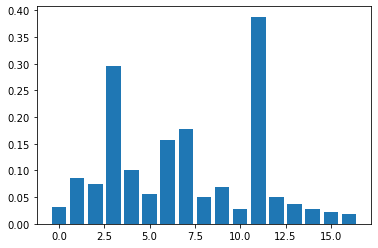

|**[Overview](#Overview)** |**[Installation](#Installation)||**[Prior-steps](#Prior-steps)**|**[How-to-use](#How-to-use)**|**[Next-steps](#Next-steps)**|**[Postscript](#Postscript)**|**[Acknowledgements](#Acknowledgments)|

# Overview

# Prior steps
Steps 5 and 9
# How-to-use

## Import Gensim, models and library

In [32]:
from gensim import similarities, models, corpora
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#hide
import os
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"

In [3]:
index = similarities.MatrixSimilarity.load(directory+'Index_for_corpus_for_similarities.index')

In [4]:
loaded_TFIDF_model = models.TfidfModel.load(directory+'model-from-input-library.tfidf')

In [5]:
Names_of_documents=(pd.read_csv(directory+'Corpus_names_of_documents.csv'))

In [17]:
from gensim.corpora import Dictionary
loaded_dictionary = Dictionary.load(directory+'Library.dict')

## Enter new text
I have done it here by assuming this is a new document.
- Run step 1, but from a fresh folder (rather than Nuclear sample folder)
- run Step 5, but back into a fresh folder (rather than Interim results)
However, this can be scraped from an internet document
Or copied in as a string
Or imported as a pdf with Step 1 and Step 2

In [18]:
directory= "/Users/lawrence/"

In [22]:
with open(os.path.join(directory,'2020-Invernizzi-Locatelli-Brookes-Characterising-nuclear-decommissioning-projects.txt')) as f:
    Fresh_text=f.read()
    f.close()

In [ ]:
Fresh_text[0:1000]

## FINDING VECTOR REPRESENTATION OF A SINGLE NEW DOCUMENT
First CBOW, then TFIDF

In [27]:
Fresh_text_bow = loaded_dictionary.doc2bow(Fresh_text.lower().split())
vec_tfidf = loaded_TFIDF_model[Fresh_text_bow]  # convert the query to TFIDF space
print(vec_tfidf[0])

(0, 0.016459011879328547)


## find cosine similarity with existing library
In addition, we will be considering cosine similarity to determine the similarity of two vectors. Cosine similarity is a standard measure in Vector Space Modeling, but wherever the vectors represent probability distributions, different similarity measures may be more appropriate.

In [28]:
Similarity_result=index[vec_tfidf]

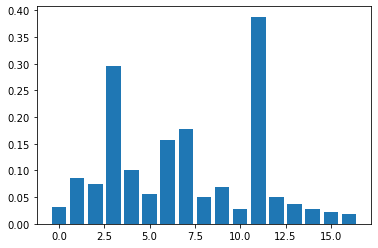

In [38]:
plt.bar(range(0,17),height=Similarity_result[0:17])
plt.show()

In [37]:
for f in range(0,17):  # change length manually 
    print (Similarity_result[f],Names_of_documents.iloc[f,0])

0.03184258 Commissioning-of-security-systems-and-infrastructure-cns-tast-gd-4.4.pdf.txt
0.08654524 Construction Assurance ns-tast-gd-076.pdf.txt
0.07395535 Control of processes involving nuclear matter ns-tast-gd-023.pdf.txt
0.2961432 Decommissioning ns-tast-gd-026.pdf.txt
0.101394355 Design Safety Assurance ns-tast-gd-057.pdf.txt
0.056371637 Fundamental Principles ns-tast-gd-004.pdf.txt
0.15782964 Guidance on the Demonstration of ALARP ns-tast-gd-005.pdf.txt
0.1772333 Management of Radioactive material ns-tast-gd-024.pdf.txt
0.049734946 nuclear construction sites cns-tast-gd-6.6.pdf.txt
0.06878129 Organisational Change ns-tast-gd-048.pdf.txt
0.028180964 oversight of items or services cns-tast-gd-4.3.pdf.txt
0.38809025 PM_guidance_for_Energy_Projects 19.43.14.txt
0.049440652 Probabilistic Safety Analysis.pdf.txt
0.037577443 Procedure Design and Administrative Controls.pdf.txt
0.027715659 Procurement cns-tast-gd-4.1.pdf.txt
0.021520244 Reliability and resilience of the security system c

## Next Steps

If you want to build a topic model of the library, then go to step 12.
Otherwise, go to step 14, to enhance the knowledge graph. 